# Case Study on Correlation and Regression

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv(r"C:\Users\USER\Downloads\Add_sales_data_2018.csv")

In [22]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,4350.683


 ### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

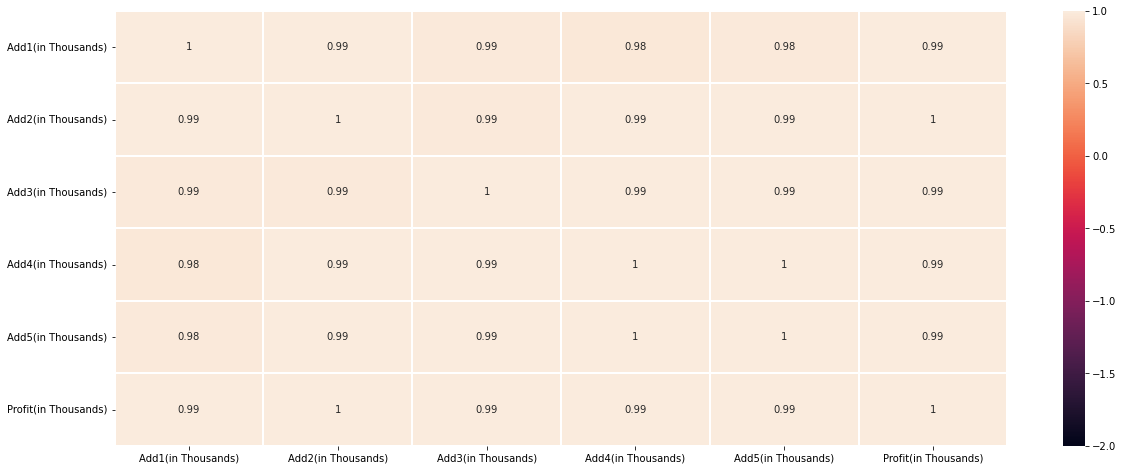

In [23]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2)

There is a strong relationship between the amount spent for advertising and the profit generated.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [24]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [25]:
y=data['Profit(in Thousands)']
x=data.drop(['Profit(in Thousands)','Date'],axis=1)

In [26]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,random_state=42,test_size=0.25)

In [27]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [35]:
# Model is created

In [28]:
from sklearn.metrics import mean_squared_error as mse
print("MSE is : ",mse(y_test,predictions))

MSE is :  1.1930489604130207e-24


### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [29]:
test_data={"Add1(in Thousands)": 290,
"Add2(in Thousands)": 312,
"Add3(in Thousands)": 309,
"Add4(in Thousands)" :298,
"Add5(in Thousands)":320}

In [30]:
test_data1=pd.DataFrame(data=test_data,index=[1])

In [31]:
test_data1

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
1,290,312,309,298,320


In [32]:
new_predictions=model.predict(test_data1)

In [33]:
print("Predicted Profit generated by the company is : ",new_predictions[0])

Predicted Profit generated by the company is :  5820.06
